# Algunos conjuntos de imágenes comunes

## MNIST

[**Modified NIST (MNIST)**](http://yann.lecun.com/exdb/mnist) es un corpus de $70\,000$ imágenes $28\times 28$ en gris de dígitos manuscritos; $60\,000$ de training y $10\,000$ de test. Desde su introducción en los 90, MNIST ha sido ampliamente usado como tarea para la comparación de técnicas de ML. Hoy en día se considera una tarea "agotada" pues ya se han alcanzado [tasas de error muy reducidas, por debajo del $0.2\%$.](https://en.wikipedia.org/wiki/MNIST_database#Classifiers)
A continuación leemos MNIST con fetch_openml de sklearn; las primeras $60\,000$ muestras son para training y las $10\,000$ para test.

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist_784_X, mnist_784_y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
x_train = mnist_784_X[:60000].astype(np.float32); y_train = mnist_784_y[:60000].astype(np.uint8)
x_test = mnist_784_X[60000:].astype(np.float32); y_test = mnist_784_y[60000:].astype(np.uint8)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


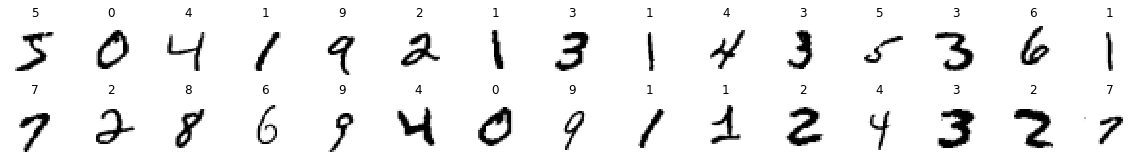

In [2]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 15
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, x_train, y_train):
    ax.set_axis_off(); image = x.reshape(28, 28); ax.set_title(y)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

## EMNIST

[**Extended MNIST (EMNIST)**](https://www.nist.gov/itl/iad/image-group/emnist-dataset) es un corpus de $814\,255$ imágenes $28\times 28$ en gris de 62 caracteres manuscritos ([0-9], [a-z] y [A-Z]). Como su nombre indica, se trata de una extensión de MNIST; de hecho, se publica en 2017 al constatar que MNIST ya está agotado. Cabe destacar que EMNIST no se presenta como un único conjunto de imágenes, sino como una colección de 6 conjuntos o tareas distintas: 
* Balanced: $814\,255$ caracteres, $47$ clases balanceadas
* ByClass: $814\,255$ caracteres, $62$ clases no balanceadas
* ByMerge:  $814\,255$ caracteres, $47$ clases no balanceadas
* Digits: $280\,000$ caracteres, $10$ clases balanceadas
* Letters: $145\,600$ caracteres, $26$ clases balanceadas
* MNIST: $70\,000$ caracteres, $10$ clases balanceadas

A continuación empleamos el [librería python emnist](https://pypi.org/project/emnist) para leerlo.

In [3]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples, extract_test_samples
dataset = 'byclass'
X_train, y_train = extract_training_samples(dataset)
X_test, y_test = extract_test_samples(dataset)
print(dataset, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

byclass (697932, 28, 28) (697932,) (116323, 28, 28) (116323,)


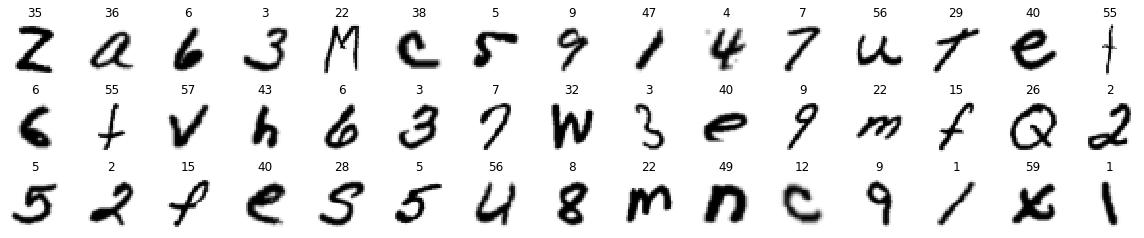

In [5]:
import matplotlib.pyplot as plt
nrows = 3; ncols = 15
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); ax.set_title(f"{y}"); ax.imshow(x, cmap=plt.cm.gray_r, interpolation="none")

## Fashion-MNIST

**Fashion-MNIST** incluye 60K+10K imágenes $28\times 28$ de 10 clases.

## CIFAR

**CIFAR** consta de 50K+10K imágenes $32\times 32\times 3$ (RGB) de 10 clases.

## ImageNet

**ImageNet** se compone de 14M imágenes $256\times 256\times 3$ de objetos de 20K clases.
